# |Loan Application Status Prediction-DS2306-Date-04-11-23-Sudhanshu Kumar Singh|

In [68]:
# Import important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [69]:
#Load the data
# Load the dataset
data = pd.read_csv("D:/sks/Flip_Robo_techonology _project/Project_discussion/Third_Phase_Project/projects - oct 2p023/loan_prediction.csv")

In [70]:
data.shape

(614, 13)

In [71]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [72]:
# Statistics summary 
print(data.describe())


       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [73]:
#data information 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [74]:
# Check for missing values
print(data.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [75]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [76]:
# numerical_column to handle missing value 
numerical_columns=['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [77]:
# Fill missing numerical values with the mean
for column in numerical_columns:
    if column in data:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        print(f"Column '{column}' not found in the dataset.")

In [78]:
#categorical_column to handle missing value 
categorical_columns=['Gender','Married','Dependents','Self_Employed']

In [79]:
# Fill missing categorical values with the mode (most frequent value)
for column in categorical_columns:
    if column in data:
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        print(f"Column '{column}' not found in the dataset.")

In [80]:
#Again checking missing value are now filled or not 
print(data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [81]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [82]:
# Define a function to handle outliers using the IQR method
def handle_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

In [83]:
# Handle outliers for numerical columns
for column in numerical_columns:
    handle_outliers_iqr(data, column)

In [84]:
# Save the data with outliers handled to a new CSV file
data.to_csv('outliers_handled_data.csv', index=False)

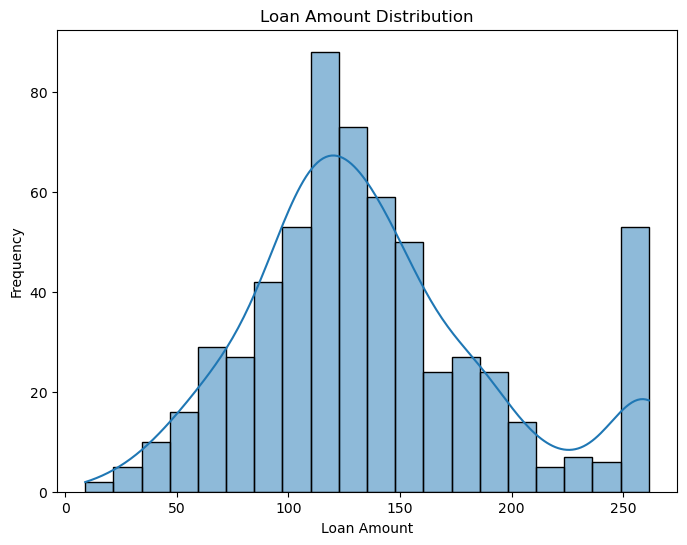

In [85]:
# Histogram for a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data['LoanAmount'], bins=20, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

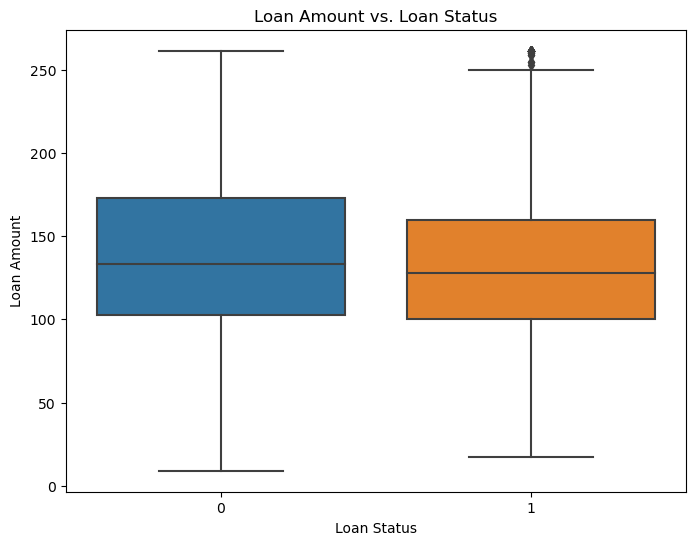

In [86]:
# Box plot for comparing a numerical column across categories
plt.figure(figsize=(8, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=data)
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

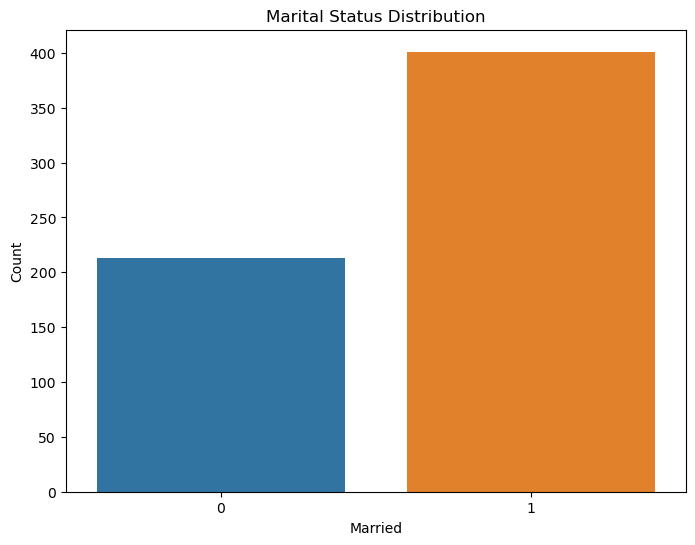

In [87]:
# Bar plot for categorical data
plt.figure(figsize=(8, 6))
sns.countplot(x='Married', data=data)
plt.title('Marital Status Distribution')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()

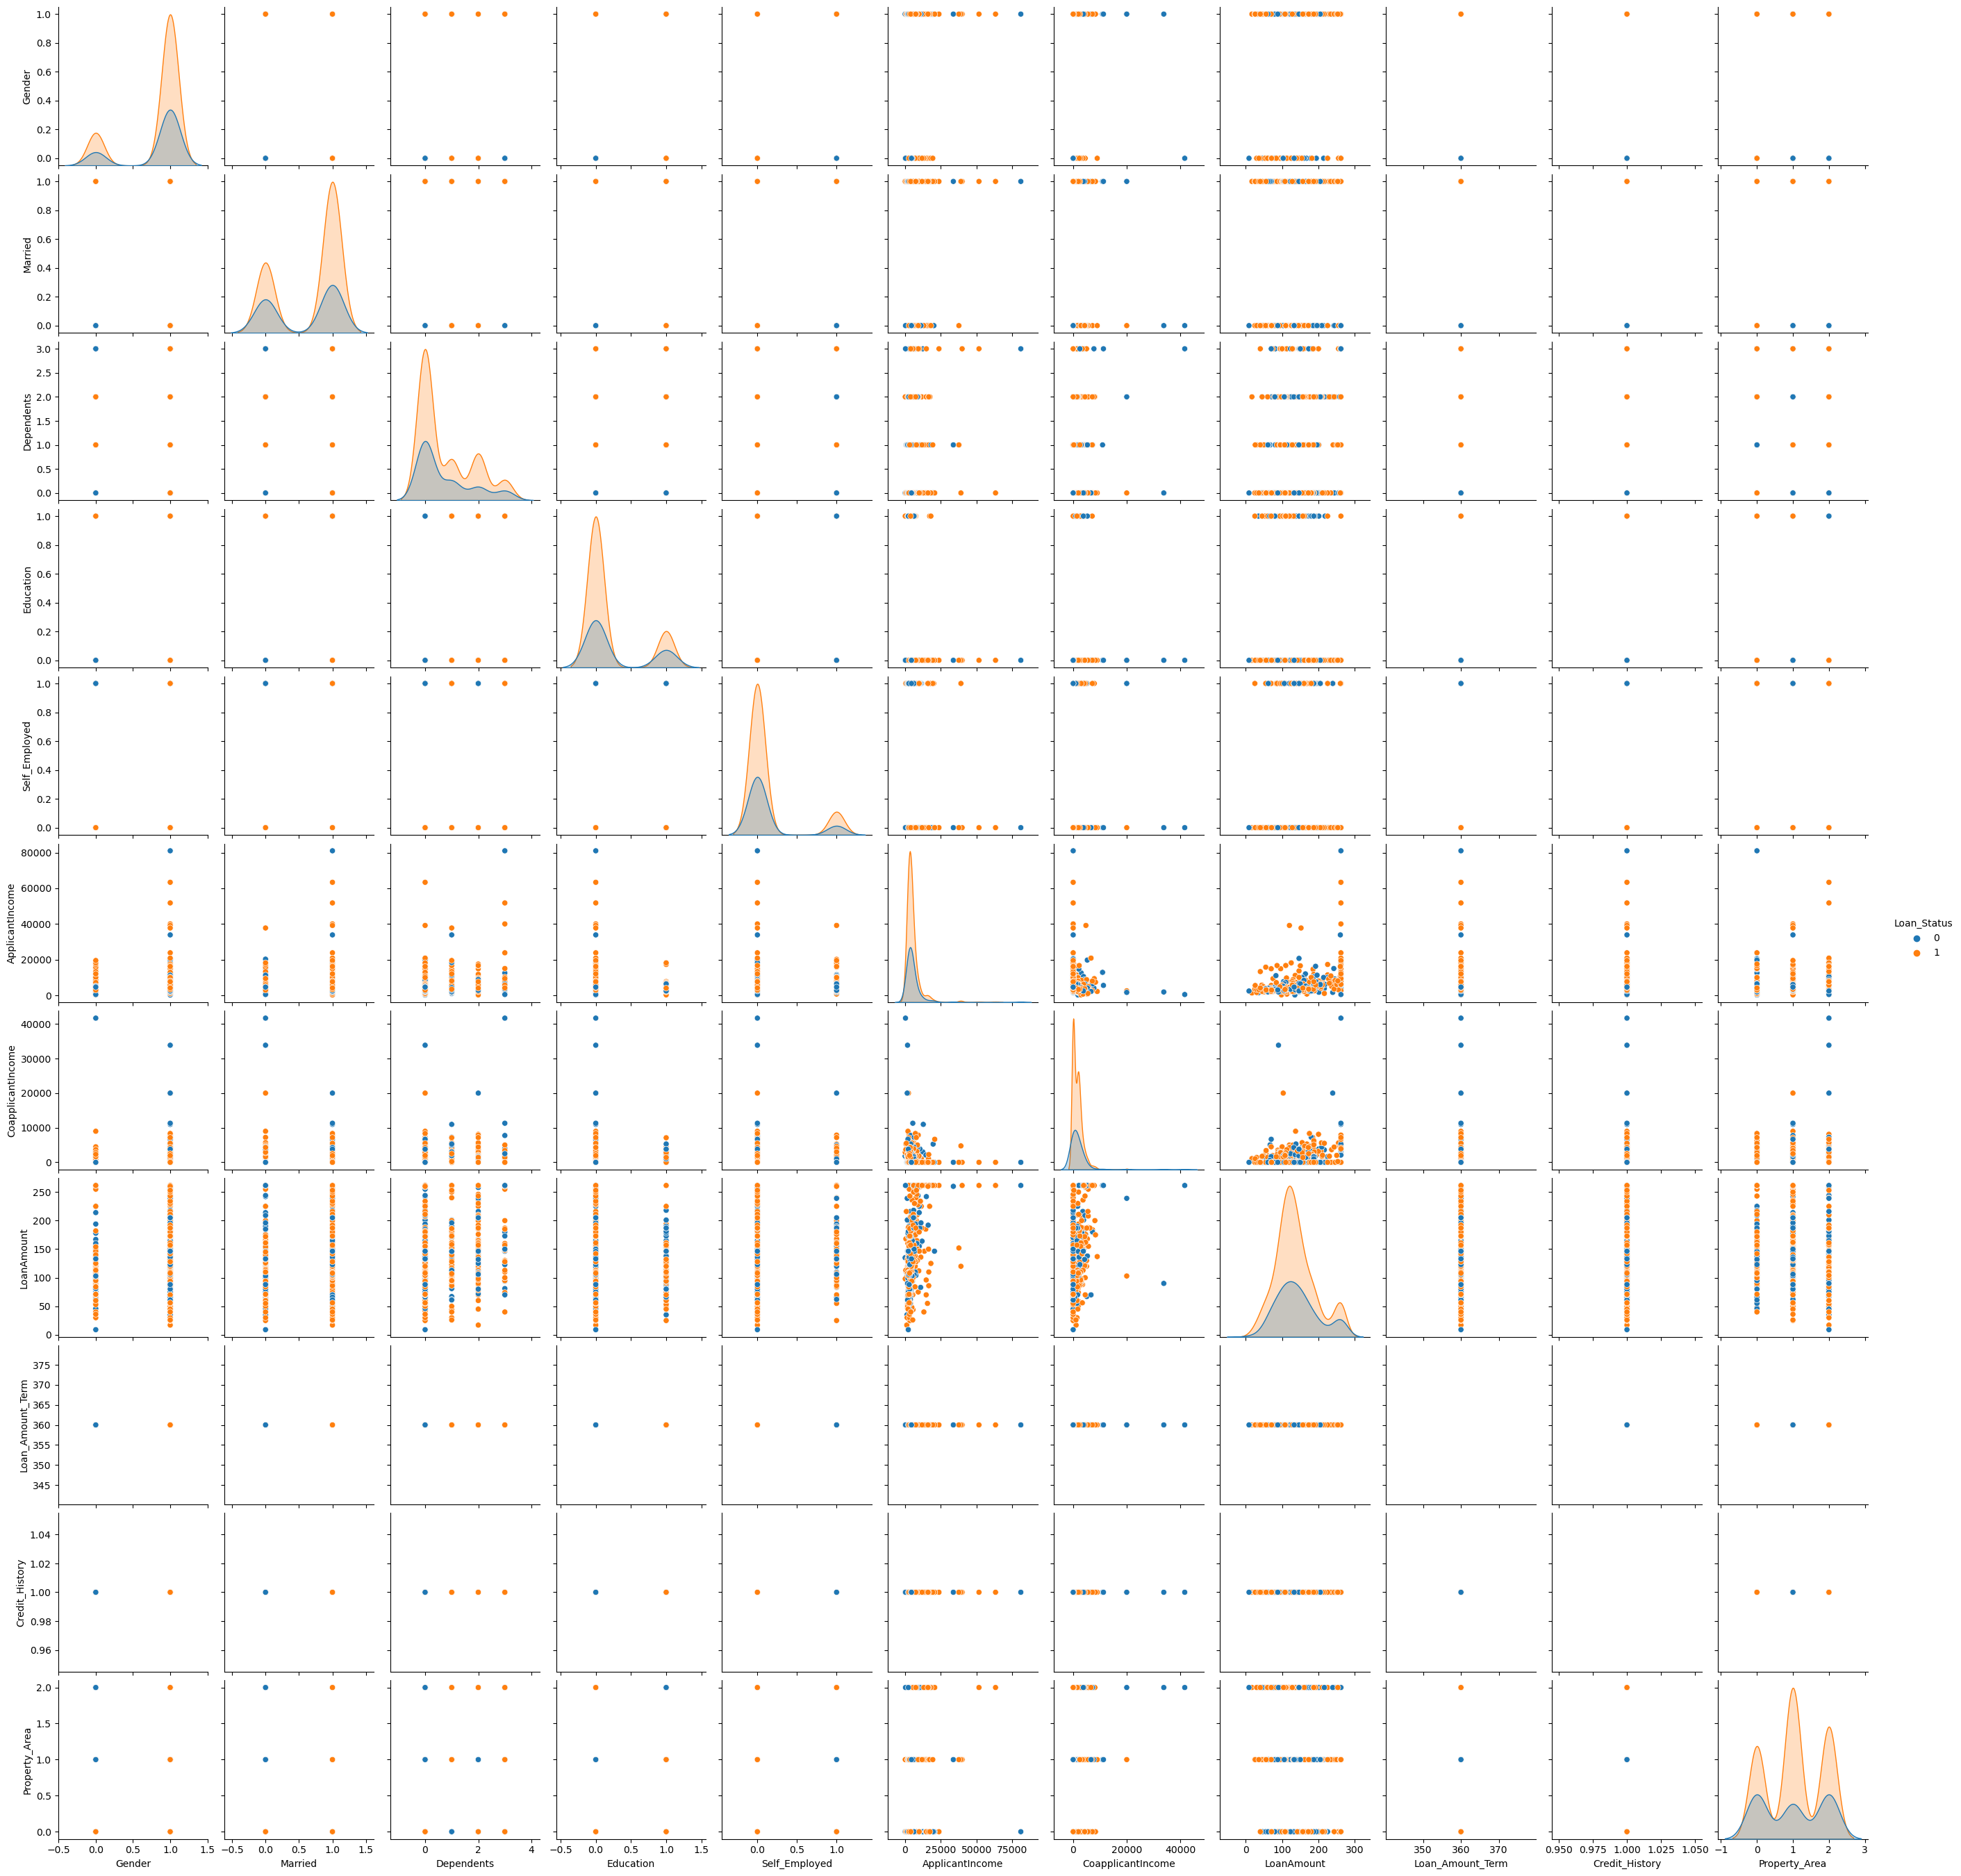

In [88]:
# Pairplot for exploring relationships between numerical columns
sns.pairplot(data, hue='Loan_Status')
plt.show()

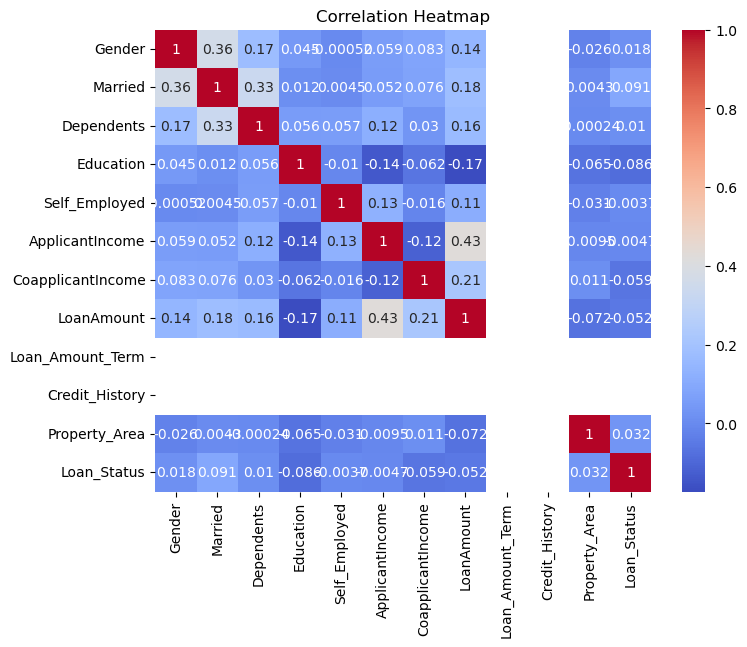

In [89]:
# Correlation heatmap for numerical columns
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

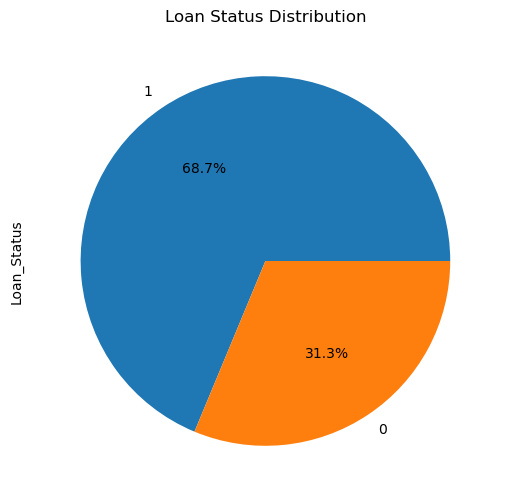

In [90]:
# Pie chart for a categorical variable
plt.figure(figsize=(8, 6))
data['Loan_Status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

In [91]:
# Split the data into training and testing sets
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Machine Learning Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [93]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

           0       0.14      0.02      0.04        43
           1       0.64      0.93      0.76        80

    accuracy                           0.61       123
   macro avg       0.39      0.47      0.40       123
weighted avg       0.46      0.61      0.51       123



In [95]:
#Machine learning model (Support Vector Machine - SVM)
model = SVC(kernel='linear', C=1.0, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)


In [96]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6910569105691057
              precision    recall  f1-score   support

           0       0.86      0.14      0.24        43
           1       0.68      0.99      0.81        80

    accuracy                           0.69       123
   macro avg       0.77      0.56      0.52       123
weighted avg       0.74      0.69      0.61       123

